In [3]:

pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=c8e552b8494db02c9528956f203d69ceb84a7fd157a6fbf07b6531318a3ec6a6
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


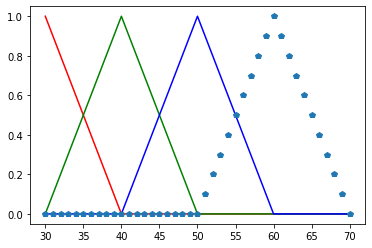

In [15]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,71,1)
slow=fuzz.trimf(x, [30,30,40])
medium=fuzz.trimf(x, [30,40,50])
medium_fast=fuzz.trimf(x, [40,50,60])
full_speed=fuzz.trimf(x, [50,60,70])
plt.figure()
plt.plot(x,slow,'r', linewidth=1.5, label='SLOW')
plt.plot(x,medium,'g', linewidth=1.5, label='MEDIUM')
plt.plot(x,medium_fast,'b', linewidth=1.5, label='MEDIUM_FAST')
plt.plot(x,full_speed,'p', linewidth=1.5, label='FULL_SPEED')


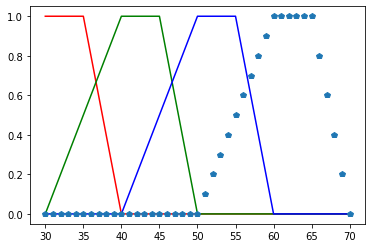

In [20]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,71,1)
slow=fuzz.trapmf(x, [30,30,35,40])
medium=fuzz.trapmf(x, [30,40,45,50])
medium_fast=fuzz.trapmf(x, [40,50,55, 60])
full_speed=fuzz.trapmf(x, [50,60, 65, 70])
plt.figure()
plt.plot(x,slow,'r', linewidth=1.5, label='SLOW')
plt.plot(x,medium,'g', linewidth=1.5, label='MEDIUM')
plt.plot(x,medium_fast,'b', linewidth=1.5, label='MEDIUM_FAST')
plt.plot(x,full_speed,'p', linewidth=1.5, label='FULL_SPEED')

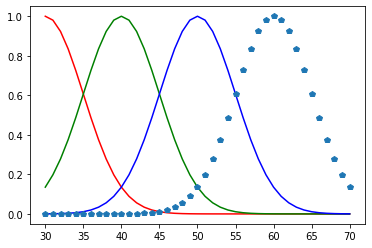

In [22]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,71,1)
slow=fuzz.gaussmf(x, 30,5)
medium=fuzz.gaussmf(x, 40,5)
medium_fast=fuzz.gaussmf(x,50,5)
full_speed=fuzz.gaussmf(x, 60,5)
plt.figure()
plt.plot(x,slow,'r', linewidth=1.5, label='SLOW')
plt.plot(x,medium,'g', linewidth=1.5, label='MEDIUM')
plt.plot(x,medium_fast,'b', linewidth=1.5, label='MEDIUM_FAST')
plt.plot(x,full_speed,'p', linewidth=1.5, label='FULL_SPEED')

21.190476190476193


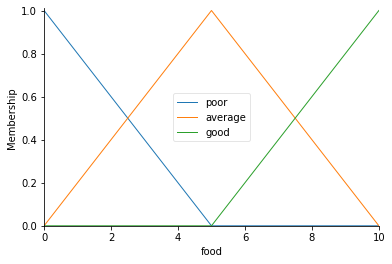

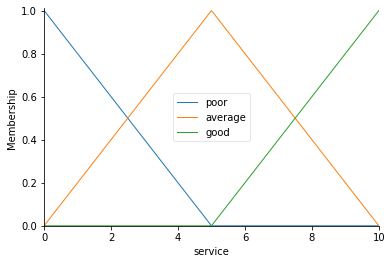

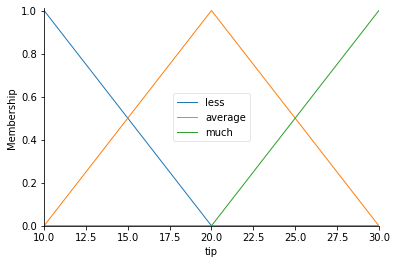

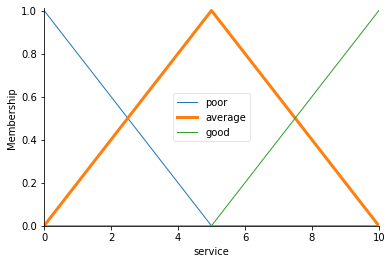

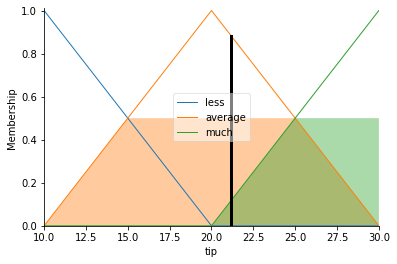

In [32]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['average']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()
service['average'].view()
rule1=ctrl.Rule(food['poor'] & service ['poor'], tip['less'])
rule2=ctrl.Rule(food['poor'] & service ['average'], tip['less'])
rule3=ctrl.Rule(food['poor'] & service ['good'], tip['average'])
rule4=ctrl.Rule(food['average'] & service ['poor'], tip['less'])
rule5=ctrl.Rule(food['average'] & service ['average'], tip['average'])
rule6=ctrl.Rule(food['average'] & service ['good'], tip['much'])
rule7=ctrl.Rule(food['good'] & service ['poor'], tip['average'])
rule8=ctrl.Rule(food['good'] & service ['average'], tip['much'])
rule9=ctrl.Rule(food['good'] & service ['good'], tip['much'])
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=7.5
tipping.input['service']=7.0
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

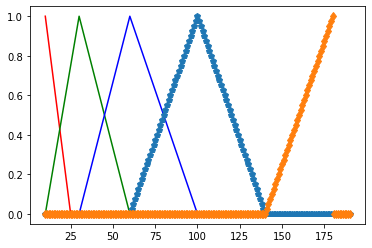

In [35]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(10,191,1)
VF=fuzz.trimf(x, [10,10,25])
F=fuzz.trimf(x, [10,30,60])
N=fuzz.trimf(x, [30,60,100])
S=fuzz.trimf(x, [60,100,140])
VS=fuzz.trimf(x, [140,180,180])
plt.figure()
plt.plot(x,VF,'r', linewidth=1.5, label='vf')
plt.plot(x,F,'g', linewidth=1.5, label='f')
plt.plot(x,N,'b', linewidth=1.5, label='n')
plt.plot(x,S,'p', linewidth=1.5, label='s')
plt.plot(x,VS,'d', linewidth=1.5, label='vs')

81.29937189685987


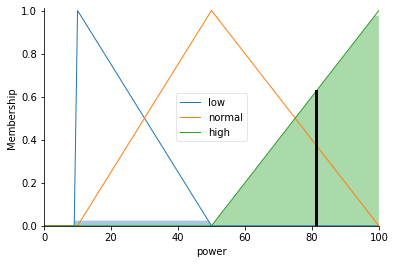

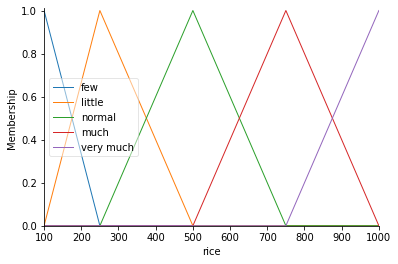

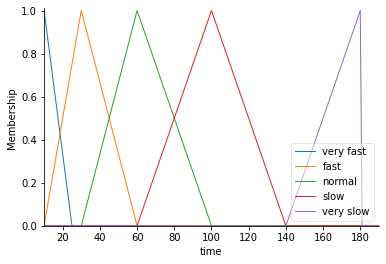

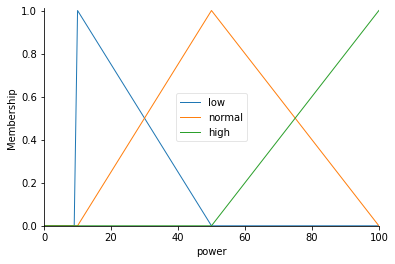

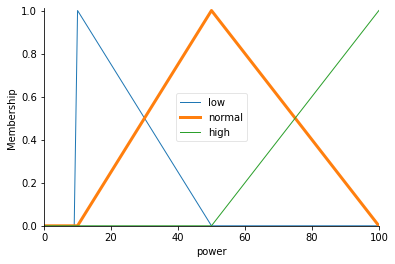

In [41]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
time=ctrl.Antecedent(np.arange(10,191,1),'time')
rice=ctrl.Antecedent(np.arange(100,1001,1),'rice')
power=ctrl.Consequent(np.arange(0,101,1),'power')
time['very fast']=fuzz.trimf(time.universe,[10,10,25])
time['fast']=fuzz.trimf(time.universe,[10,30,60])
time['normal']=fuzz.trimf(time.universe,[30,60,100])
time['slow']=fuzz.trimf(time.universe,[60,100,140])
time['very slow']=fuzz.trimf(time.universe,[140,180,180])
rice['few']=fuzz.trimf(rice.universe,[100,100,250])
rice['little']=fuzz.trimf(rice.universe,[100,250,500])
rice['normal']=fuzz.trimf(rice.universe,[250,500,750])
rice['much']=fuzz.trimf(rice.universe,[500,750,1000])
rice['very much']=fuzz.trimf(rice.universe,[750,1000,1000])
power['low']=fuzz.trimf(power.universe,[10,10,50])
power['normal']=fuzz.trimf(power.universe,[10,50,100])
power['high']=fuzz.trimf(power.universe,[50,100,100])
rule1=ctrl.Rule(rice['few'] & time['very fast'], power['high'])
rule2=ctrl.Rule(rice['few'] & time['fast'], power['high'])
rule3=ctrl.Rule(rice['few'] & time['normal'], power['normal'])
rule4=ctrl.Rule(rice['few'] & time['slow'], power['low'])
rule5=ctrl.Rule(rice['few'] & time['very slow'], power['low'])
rule6=ctrl.Rule(rice['little'] & time['very fast'], power['low'])
rule7=ctrl.Rule(rice['little'] & time['fast'], power['high'])
rule8=ctrl.Rule(rice['little'] & time['normal'], power['normal'])
rule9=ctrl.Rule(rice['little'] & time['slow'], power['high'])
rule10=ctrl.Rule(rice['little'] & time['very slow'], power['low'])
rule11=ctrl.Rule(rice['normal'] & time['very fast'], power['high'])
rule12=ctrl.Rule(rice['normal'] & time['fast'], power['low'])
rule13=ctrl.Rule(rice['normal'] & time['normal'], power['normal'])
rule14=ctrl.Rule(rice['normal'] & time['slow'], power['high'])
rule15=ctrl.Rule(rice['normal'] & time['very slow'], power['low'])
rule16=ctrl.Rule(rice['much'] & time['very fast'], power['high'])
rule17=ctrl.Rule(rice['much'] & time['fast'], power['high'])
rule18=ctrl.Rule(rice['much'] & time['normal'], power['low'])
rule19=ctrl.Rule(rice['much'] & time['slow'], power['low'])
rule20=ctrl.Rule(rice['much'] & time['very slow'], power['normal'])
rule21=ctrl.Rule(rice['very much'] & time['very fast'], power['high'])
rule22=ctrl.Rule(rice['very much'] & time['fast'], power['normal'])
rule23=ctrl.Rule(rice['very much'] & time['normal'], power['low'])
rule24=ctrl.Rule(rice['very much'] & time['slow'], power['low'])
rule25=ctrl.Rule(rice['very much'] & time['very slow'], power['normal'])
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['time']=100
tipping.input['rice']=506
tipping.compute()
print(tipping.output['power'])
power.view(sim=tipping)
rice.view()
time.view()
power.view()
power['normal'].view()